<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#With-librosa:-specshow,-melspectrogram,-amplitude_to_db" data-toc-modified-id="With-librosa:-specshow,-melspectrogram,-amplitude_to_db-1">With librosa: <code>specshow</code>, <code>melspectrogram</code>, <code>amplitude_to_db</code></a></span></li><li><span><a href="#Without-librosa:-specshow,-melspectrogram,-amplitude_to_db" data-toc-modified-id="Without-librosa:-specshow,-melspectrogram,-amplitude_to_db-2">Without librosa: <code>specshow</code>, <code>melspectrogram</code>, <code>amplitude_to_db</code></a></span></li></ul></div>

# With librosa: `specshow`, `melspectrogram`, `amplitude_to_db`

In [1]:
from numpy import *
from functools import wraps
from matplotlib.pylab import *
from hum.gen.diagnosis_sounds import mk_sounds_with_timed_bleeps
from hum.gen.diagnosis_sounds import WfGen, TimeSound, BinarySound, slow_mask
from hum.sound.audio_librosa import Sound
import ut.util.utime as utime

/Users/owenlloyd/opt/anaconda3/envs/oto3/lib/python3.8/site-packages/py2store/access.py:325: UserWarning: The configs directory wasn't found (please make it): /Users/owenlloyd/.py2store_configs
  warn(


In [2]:
@wraps(plot)
def pplot(*args, **kwargs):
    figure(figsize=(16, 5))
    plot(*args, **kwargs)

In [3]:
nbits=50
bs = BinarySound.for_audio_params(
    nbits=nbits, freq=6000, chk_size=43008, sr=44100, header_size_words=2)

In [4]:
utc = randint(0, 2, nbits)
wf = bs.mk_phrase(utc)

In [5]:
print(bs)

{'repetition': 3, 'word_size_frm': 150, 'redundancy': 141, 'phrase_data_frm': 21150}


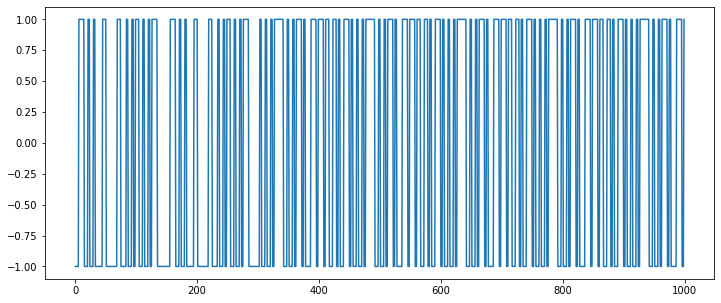

In [6]:
figure(figsize=(12,5)); plot(wf[:1000]);

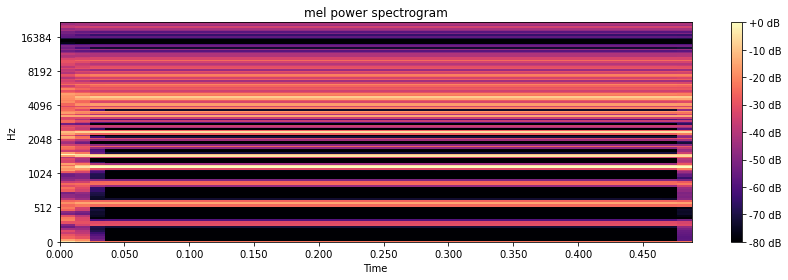

In [7]:
Sound(wf=wf, sr=bs.sr).display()

array([[ -5.02732786, -10.12639823, -21.40258583, ..., -23.42036647,
        -23.439906  , -23.01376389],
       [-15.54358505, -19.34045936, -52.00962656, ..., -80.        ,
        -80.        , -57.33575556],
       [-26.30233531, -29.93807127, -55.71910063, ..., -80.        ,
        -80.        , -57.8195868 ],
       ...,
       [-39.71346387, -42.49190469, -44.78789294, ..., -44.84210925,
        -44.84207841, -45.11199502],
       [-44.56604897, -42.56510664, -41.53892058, ..., -41.51649726,
        -41.5164582 , -41.78240496],
       [-46.91294236, -45.23638663, -44.74528486, ..., -44.756132  ,
        -44.75613488, -44.71252968]])

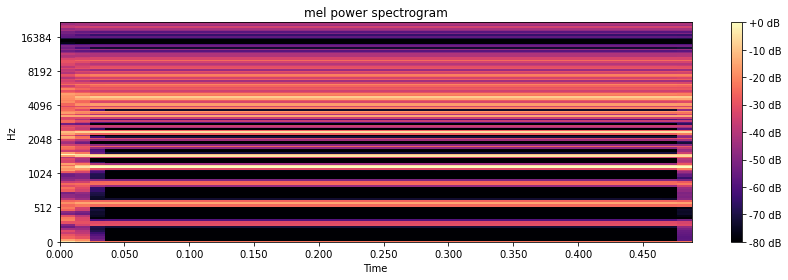

In [8]:
Sound(wf=wf, sr=bs.sr).melspectrogram(plot_it=True)

In [9]:
decoded_wf = bs.decode(wf)
print(utc)
print(decoded_wf)
print("alice and bob agree: {}".format(all(utc == decoded_wf)))

[0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0
 1 1 0 0 1 1 0 1 0 0 1 1 1]
[0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0
 1 1 0 0 1 1 0 1 0 0 1 1 1]
alice and bob agree: True


Header position: 0
alice and bob agree: True


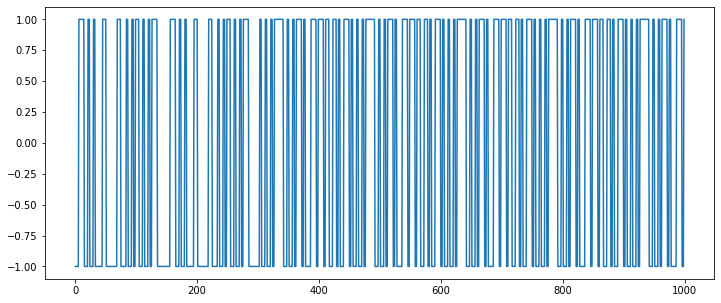

In [10]:
noise_ratio = 1  # proportion of bits to flip
lidx = rand(len(wf)) > noise_ratio
wff = wf.copy()
wff[lidx] = -wff[lidx]
figure(figsize=(12,5)); plot(wff[:1000])
print("Header position: {}".format(bs.header_position(wff)))

decoded_wf = bs.decode(wf)
print("alice and bob agree: {}".format(all(utc == decoded_wf)))

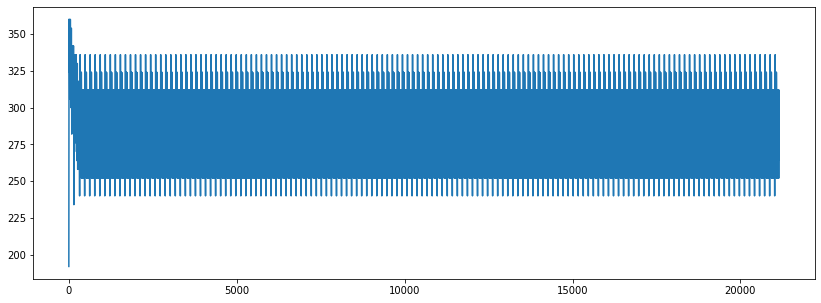

In [11]:
w = slow_mask(wff, bs.header_word)
figure(figsize=(14,5)); plot(w);

Header position: 12260
alice and bob agree: False


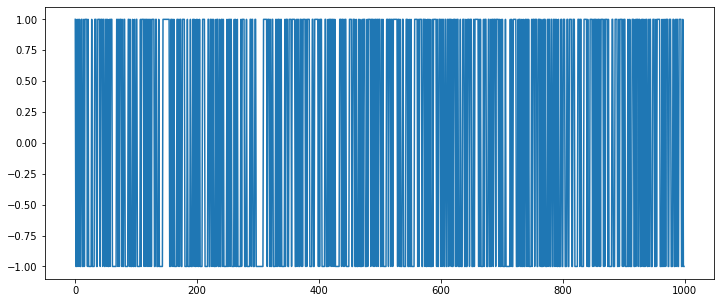

In [12]:
noise_ratio = 0.5  # proportion of bits to flip
lidx = rand(len(wf)) > noise_ratio
wff = wf.copy()
wff[lidx] = -wff[lidx]
figure(figsize=(12,5)); plot(wff[:1000])
print("Header position: {}".format(bs.header_position(wff)))

decoded_wf = bs.decode(wff)
print("alice and bob agree: {}".format(all(utc == decoded_wf)))

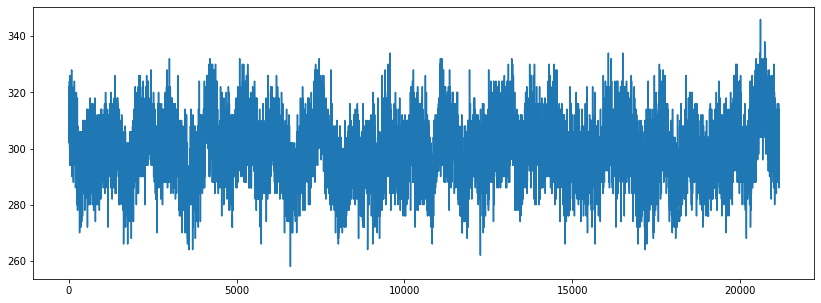

In [13]:
w = slow_mask(wff, bs.header_word)
figure(figsize=(14,5)); plot(w);

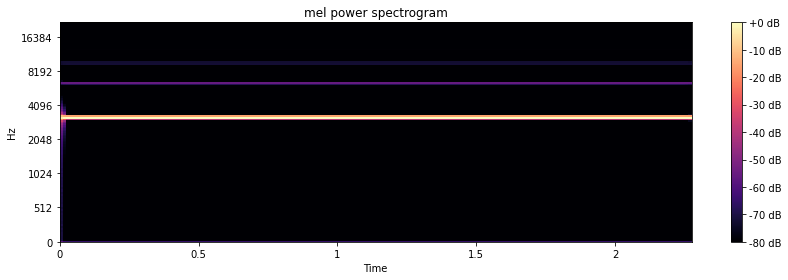

In [14]:
wf = WfGen().mk_sine_wf(100000, 3000)
s = Sound(wf, sr=44100)
s.display()

# Without librosa: `specshow`, `melspectrogram`, `amplitude_to_db`

In [15]:
from numpy import *
from functools import wraps
from matplotlib.pylab import *
from hum.gen.diagnosis_sounds import mk_sounds_with_timed_bleeps
from hum.gen.diagnosis_sounds import WfGen, TimeSound, BinarySound, slow_mask
from hum.sound.audio_librosa import Sound
import ut.util.utime as utime

In [16]:
@wraps(plot)
def pplot(*args, **kwargs):
    figure(figsize=(16, 5))
    plot(*args, **kwargs)

In [17]:
nbits=50
bs = BinarySound.for_audio_params(
    nbits=nbits, freq=6000, chk_size=43008, sr=44100, header_size_words=2)

In [18]:
utc = randint(0, 2, nbits)
wf = bs.mk_phrase(utc)

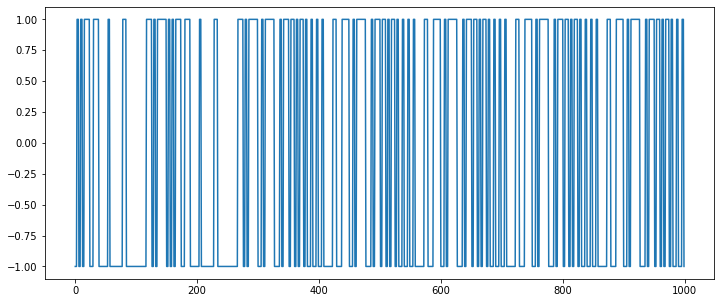

In [19]:
figure(figsize=(12,5)); plot(wf[:1000]);

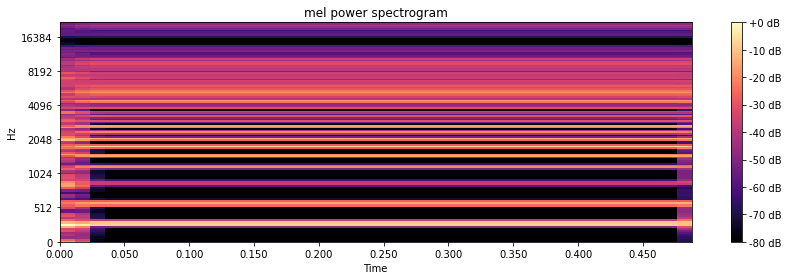

In [20]:
Sound(wf=wf, sr=bs.sr).display()

array([[-17.11594758, -27.80297464, -79.37921432, ..., -80.        ,
        -80.        , -70.92597789],
       [-26.37498065, -34.15483822, -76.30469029, ..., -80.        ,
        -80.        , -67.96850303],
       [-45.94758833, -45.12983504, -75.22949777, ..., -80.        ,
        -80.        , -66.36034682],
       ...,
       [-47.64041196, -42.61193998, -40.76760069, ..., -40.74743868,
        -40.74748249, -40.81023968],
       [-52.86076394, -48.76561686, -47.15346353, ..., -47.13350165,
        -47.13352552, -47.23701961],
       [-47.34814594, -49.5662093 , -51.34115451, ..., -51.39255967,
        -51.39251464, -51.44155989]])

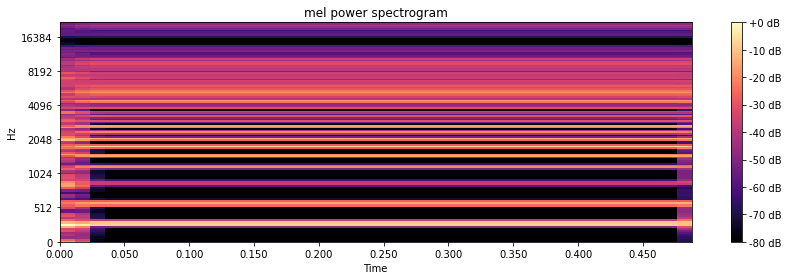

In [21]:
Sound(wf=wf, sr=bs.sr).melspectrogram(plot_it=True)